# Biodiversity in National Parks

## Introduction

This project will explore and interpret data from the National Parks service about endangered species in different parks. The analysis will focus on the conservation status of these species and investigate whether there are any patterns of themes to the types of species that become endangered.

Specifically, this project seeks to answer the following questions:

* What is the distribution of conservation status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which animal is most prevalent and what is their distribution amongst parks?

### Data Sources

Both **observations.csv** and **species_info.csv** were provided by [Codecademy.com](https://www.codecademy.com).

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Import Necessary Libraries and Inspect Data

The first step is to import the libraries used in this project for data manipulation and visualization.

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

%matplotlib inline

## Load CSV Data

Next, both **CSV** files will be loaded into DataFrames for analysis.

In [3]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Overview

In the next steps, we can get a brief overview of the DataFrames by finding out their shape, column names, unique values, and whether or not there is any missing data.

#### observations

The **observations** DataFrame contains information about recorded sightings of different species in each National Park contained in the dataset. A quick glance using the **.head()** method reveals the following columns:

* **scientific_name** - The scientific name of the species
* **park_name** - The name of the National Park
* **observations** - The number of observations in the past 7 days

In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### species

The **species** DataFrame contains information on the conservation status and categorization of each species in the National Parks. The columns are:

* **category** - The taxonomic category of the species
* **scientific_name** - The scientific name of the species
* **common_names** - The common names for the species
* **conservation_status** - The current conservation status of the species

In [5]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


We can quickly see there are several **NaN** (missing) values in the **conservation_status** column of the **species** DataFrame. This is likely due to the particular species not having a conservation designation.

The next step is to gain a high level overview of the data with the **.info()** method. This will provide us with the dimensions of each DataFrame and each column's data type.

In [6]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


**observations** has a shape of 3 columns and 23,296 rows. The data types appear to be correct and there is no missing data.

In [7]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


**species** has a shape of 4 columns and 5,824 rows. However, the **conservation_status** column only has 191 non-null values. We can confirm this missing data with the **.isna()** method.

In [8]:
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

As expected, there are 5,633 missing values in the **conservation_status** column. To rectify this, a closer look at the values in this column is necessary.

In [9]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

This confirms that the missing values in **conservation_status** are for species that are not considered at risk. These **NaN** values must be filled in with the `No Intervention` value to begin analysis on the DataFrame.

In [10]:
species = species.fillna('No Intervention')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Exploration

After taking a quick glance at the data from a high level perspective, the next step is to take a closer look at some of the more interesting categories. Specifically, it would be useful to understand the number of unique species in the dataset as well as different value counts.

In [11]:
species.scientific_name.nunique()

5541

Out of the 5,824 rows, the **species** DataFrame contains 5,541 unique species. There may be some duplicate data that can simply be dropped.

In [12]:
species.drop_duplicates(subset = ['scientific_name'], inplace = True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


In order to more fully explore the **category** column, we can look at a table of frequencies for each species type.

In [13]:
species.category.value_counts()

Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                176
Fish                  125
Amphibian              79
Reptile                78
Name: category, dtype: int64

The vast majority of species in this dataset are vascular plants, with 4,470 different types, while reptiles have the least variation with 79 species. It would also be useful to look at a proportion of values for the **category** column.

In [14]:
species.category.value_counts() / len(species.category) 

Vascular Plant       0.769175
Bird                 0.088071
Nonvascular Plant    0.060097
Mammal               0.031763
Fish                 0.022559
Amphibian            0.014257
Reptile              0.014077
Name: category, dtype: float64

The table of proportions shows that more than 76% of the species are of the vascular plant variety. These percentages will be important to consider when evaluating whether certain species are more likely to be endangered.

**conservation_status** is another interesting column that we can look at tables of frequency and proportion for.

In [15]:
species.conservation_status.value_counts()

No Intervention       5363
Species of Concern     151
Endangered              15
Threatened               9
In Recovery              3
Name: conservation_status, dtype: int64

In [16]:
species.conservation_status.value_counts() / len(species.conservation_status)

No Intervention       0.967876
Species of Concern    0.027251
Endangered            0.002707
Threatened            0.001624
In Recovery           0.000541
Name: conservation_status, dtype: float64

Over 96% of observed species in these National Parks do not currently require intervention. Fortunately, less than 1% of the species are either `Endangered` or `Threatened`.

From the **observations** DataFrame, we can look at the number of observations per park.

In [17]:
observations.groupby('park_name').observations.sum().sort_values(ascending = False)

park_name
Yellowstone National Park              1443562
Yosemite National Park                  863332
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Name: observations, dtype: int64

Yellowstone National Park appears to have the greatest amount of biodiversity with 1,443,562 observations over the 7 day period. We can also look at the proportions based on the total number of observations.

In [18]:
observations.observations.sum()

3314739

In [19]:
observations.groupby('park_name').observations.sum().sort_values(ascending = False) / observations.observations.sum()

park_name
Yellowstone National Park              0.435498
Yosemite National Park                 0.260452
Bryce National Park                    0.173777
Great Smoky Mountains National Park    0.130273
Name: observations, dtype: float64

Yellowstone National Park has 43.5% percent of 3,314,739 total observations, while Great Smoky Mountains National Park has the lowest percentage of sightings at 13%.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Analysis

Now that the data has been cleaned and prepared, the analysis can begin. The first section seeks to answer the following question from the introduction:

* **What is the distribution of conservation status for animals?**

The first step is to select a subset of the **species** DataFrame that excludes plant species and animals without a conservation status.

In [21]:
animals_sub = species[(species.category != 'Vascular Plant') & (species.category != 'Nonvascular Plant')\
                     & (species.conservation_status != 'No Intervention')]

A contingency table is useful for providing a quick overview of the frequency distributions for **conservation_status**.

In [27]:
pd.crosstab(animals_sub.conservation_status, animals_sub.category)

category,Amphibian,Bird,Fish,Mammal,Reptile
conservation_status,,,,,
Endangered,1,4,3,6,0
In Recovery,0,3,0,0,0
Species of Concern,4,68,4,22,5
Threatened,2,0,3,2,0


Mammals and birds have the highest values of `Endangered` at 6 and 4, respectively. Birds have 75 species that have a protected status, but they are also the only category to have species `In Recovery` (3).

When comparing two categorical variables, a side-by-side bar chart provides a good visualization of the frequency count by **species** and **conservation_status**.

Text(0.5, 1.0, 'Distribution of Conservation Statuses by Species')

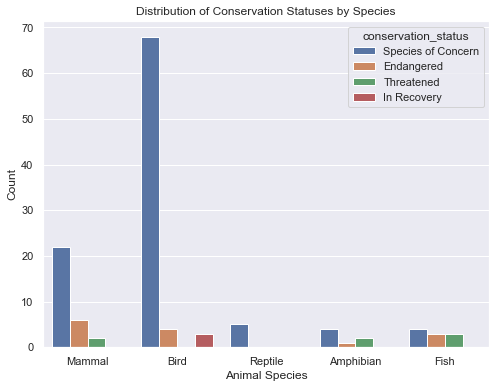

In [29]:
sns.set_theme(style = 'darkgrid')

plt.figure(figsize = (8, 6))
sns.countplot(data = animals_sub, x = 'category', hue = 'conservation_status')
plt.xlabel('Animal Species')
plt.ylabel('Count')
plt.title('Distribution of Conservation Statuses by Species')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

* **Are certain types of species more likely to be endangered?**

To investigate whether certain species are more likely to be endangered than others, a new column **is_protected** will be created.

In [33]:
species['is_protected'] = species.conservation_status != 'No Intervention'

This column includes any species that does not have a value of `No Intervention`. The next step is to group by both **category** and **is_protected** to produce a pivot table of each species' protection status. A new column **percent_protected** will then be added to the pivot table to give some context on the percentage of each species protected.

In [31]:
cat_pivot = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
                            .pivot(columns = 'is_protected', index = 'category', values = 'scientific_name')\
                            .reset_index()
cat_pivot.columns = ['category', 'not_protected', 'protected']

cat_pivot['percent_protected'] = cat_pivot.protected / (cat_pivot.not_protected + cat_pivot.protected) * 100
cat_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,10,8.000000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


17% of all observed mammal species and 15% of bird species are protected, which could indicate a higher rate of endangerment. However, more analysis is needed to determine if these results are statistically significant.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

* **Are the differences between species and their conservation status significant?**

To ascertain whether different species have statistically significant differences in conservation rates, this section will perform some Chi-Square Tests. These tests are useful when comparing two categorical variables (in our case, **is_protected** and **category**).

The first Chi-Square test will assess whether the conservation rates for **mammals**, the highest reported percentage of protected species, are statistically different from the conservation rates for **reptiles**, the lowest reported percentage of protected species. First, a contingency table will be created followed by the Chi-Square Test which will report the p-value. We will use a p-value of 0.05 to ascertain statistical signifcance, a common threshold in hypothesis tests.

In [34]:
table = [[30, 146], [5, 73]]
chi2, pval, dof, expected = chi2_contingency(table)
pval

0.03835559022969898

A p-value of 0.038 is a statistically significant result and indicates that mammals are much more likely to need protection than reptiles are.

The next Chi-Square Test will compare the protection rates of **birds**, our second highest observed rate, and **amphibians**.

In [35]:
table = [[75, 413], [7, 72]]
chi2, pval, dof, expected = chi2_contingency(table)
pval

0.17593613249594683

A p-value of 0.175 is not a statistically significant result. Therefore, we cannot conclude that birds are more likely to be protected than amphibians are.

The final Chi-Square test will look at the protection rates of **reptiles** and **non-vascular plants**.

In [38]:
table = [[5, 73], [5, 328]]
chi2, pval, dof, expected = chi2_contingency(table)
pval

0.0336269831072617

A p-value of 0.033 indicates that reptiles, our lowest observed protection rate amongst animals, are much more likely to need protection than non-vascular plants, our highest observed protection rate amongst plants.

It is reasonable to conclude the species in the animal kingdom are far more likely to need protection than plants.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

* **Which animal is most prevalent and what is their distribution amongst parks?**

In order to answer the final question, values from both DataFrames are needed. The **observations** column from **observations** and **common_names** from **species** are essential to the analysis.

The next step is to perform a merge on the **scientific_name** columns that the DataFrames have in common.

In [78]:
df = pd.merge(observations, species, how = 'left')
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention,False
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention,False
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention,False


Now, we need to extract the name of each animal from the **common_names** column and add it to a new column called **species**.

In [79]:
df['species'] = df.common_names.apply(lambda x: x.split(' ')[-1])
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,species
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,Vetch
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False,Mink
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention,False,Plum
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention,False,Velvetleaf
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention,False,Bluecup


To identify which animal species is most prevalent, a variable **animals** will be created that consists of our combined DataFrame minus the `Vascular Plant` and `Nonvascular Plant` **category**. Then, each animal species will be grouped by their total number of observations

In [71]:
animals = df[(df.category != 'Vascular Plant') & (df.category != 'Nonvascular Plant')]
animals.groupby('species').observations.sum().sort_values(ascending = False).head(10)

species
Warbler       32843
Salamander    23377
Sparrow       16278
Snake         14649
Shiner        11473
Shrew         10348
Darter        10313
Flycatcher    10022
Bat            9462
Mouse          8958
Name: observations, dtype: int64

The `Warbler`, a species of **bird**, is the most prevalent animal in the four National Parks, with 32,843 observations over a 7 day period.

We can create a table and pie chart to show the distribution of the `Warbler` across each National Park.

In [102]:
warblers = df[df.species == 'Warbler']
warbler_dist = warblers.groupby('park_name').observations.sum().sort_values(ascending = False).reset_index()
warbler_dist

,park_name,observations
0,Yellowstone National Park,14247
1,Yosemite National Park,8581
2,Bryce National Park,5636
3,Great Smoky Mountains National Park,4379


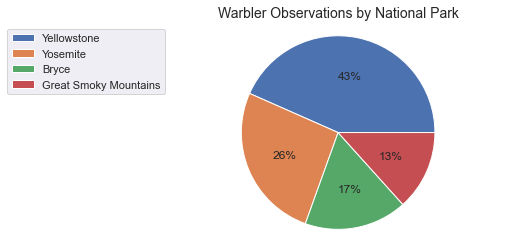

In [115]:
plt.pie(warbler_dist.observations, autopct = '%d%%')
plt.title('Warbler Observations by National Park', fontsize = 14)
plt.axis('equal')
plt.legend(['Yellowstone', 'Yosemite', 'Bryce', 'Great Smoky Mountains'], bbox_to_anchor=(0, 1))

Most `Warbler` sightings occurred in Yellowstone National Park while the least number of observations were in Great Smoky Mountains National Park. This matches our expectation based on the number of observations across all species for each National Park.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Conclusion

Through a combination of data manipulation and visualization techniques, this project was able to draw several conclusions about the various species in the four National Parks that comprised this dataset.

Specifically, the project was able to answer the following questions posed in the introduction:

* What is the distribution of conservation status for animals?
    * The vast majority of species (96%) do not currently require intervention. Fortunately, only 15 species (less than 0.3%) are considered Endangered. The most common protected status is Species of Concern (151).
* Are certain types of species more likely to be endangered?
    * Yes, mammals and birds have the highest percentage of their species in protection. Both Vascular and Nonvascular Plants only have between 1 and 2% of their species protected.
* Are the differences between species and their conservation status statistically significant?
    * For certain species, yes. For example, mammals and reptiles have statistically signfiicant conservation rates, while birds and amphibians do not.
* Which animal is most prevalent and what is their distribution amongst parks?
    * Warblers are the most commonly observed animal species and they were most likely to be found in Yellowstone National Park. Yellowstone exhibited the greatest biodiversity, but this could be due to its relative size.